In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [51]:
def meanX(dataX):
    return np.mean(dataX,axis=0)

In [52]:
def variance(X):
    m, n = np.shape(X)   #m,n为X的行数和列数
    mu = meanX(X)
    muAll = np.tile(mu, (m, 1))   #把均值变成 m行，1列的矩阵
    X1 = X - muAll              #原矩阵-均值矩阵
    variance = 1./m * np.diag(X1.T * X1)  #np.diag提取一个二位数组的对角元素，形成一维数组
    return variance

In [53]:
def normalize(X):
    m, n = np.shape(X)
    mu = meanX(X)
    muAll = np.tile(mu, (m, 1))
    X1 = X - muAll
    X2 = np.tile(np.diag(X.T * X), (m, 1))
    XNorm = X1/X2
    return XNorm

In [54]:
def pca(XMat, k):
    average = meanX(XMat)
    m, n = np.shape(XMat)
    data_adjust = []
    avgs = np.tile(average, (m,1))
    data_adjust = XMat - avgs
    covX = np.cov(data_adjust.T)   #计算协方差矩阵
    featValue, featVec = np.linalg.eig(covX) #求解协方差矩阵的特征值
    index = np.argsort(-featValue)   #按照featValue进行从大到小排序
    finalData = []
    if k > n:
        print('k must lower than feature number')
        return
    else:
        #注意特征向量时列向量，而numpy的二维矩阵(数组)a[m][n]中，a[1]表示第1行值
        selectVec = np.matrix(featVec.T[index[:k]])   #这里进行转置
        finalData = data_adjust * selectVec.T
        reconData = (finalData * selectVec) + average
    return finalData, reconData

In [65]:
def loaddata(datafile):
    return np.array(pd.read_csv(datafile)).astype(np.float)

In [66]:
def plotBestFit(data1, data2):
    dataArr1 = np.array(data1)
    dataArr2 = np.array(data2)
    
    m = np.shape(dataArr1)[0]
    axis_x1 = []
    axis_y1 = []
    axis_x2 = []
    axis_y2 = []
    for i in range(m):
        axis_x1.append(dataArr1[i,0])    #表尾添加数据
        axis_y1.append(dataArr1[i,1])
        axis_x2.append(dataArr1[i,0])
        axis_y2.append(dataArr1[i,1])
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.scatter(axis_x1, axis_y1, s=50, c='red', marker='s')
    ax.scatter(axis_x2, axis_y2, s=50, c='blue')
    plt.xlabel('x1');plt.ylabel('x2');
    plt.savefig('outfile.png')
    plt.show()

In [67]:
def test():
    X = [[2.5, 0.5, 2.2, 1.9, 3.1, 2.3, 2, 1, 1.5, 1.1],
         [2.4, 0.7, 2.9, 2.2, 3.0, 2.7, 1.6, 1.1, 1.6, 0.9]]
    XMat = np.matrix(X).T
    k = 2
    return pca(XMat, k)

In [68]:
def main():
    datafile = 'principal_component.csv'
    XMat = loaddata(datafile)
    k = 2
    return pca(XMat, k)

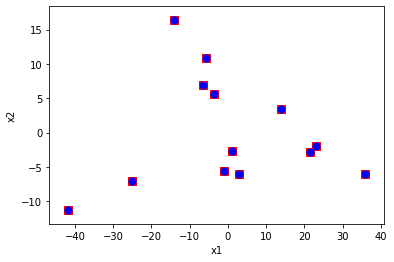

In [69]:
if __name__ == "__main__":
    finalData, reconMat = main()
    plotBestFit(finalData, reconMat)